In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
df=pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [225]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [227]:
data=df.copy()

In [228]:
data['AQI'] = data.groupby('City')['AQI'].transform(lambda x: x.fillna(x.mean()))

In [229]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,452.122939,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,452.122939,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,452.122939,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,452.122939,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,452.122939,NaN


In [230]:
cols=['PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
original_rows = df.shape[0]
combined_mask=pd.Series(True,index=data.index)
for col in cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    col_mask=(df[col]>=lower_bound)&(df[col]<=upper_bound)
    combined_mask=combined_mask&col_mask
data=data[combined_mask]
data.shape

(4179, 16)

In [231]:
data=data.fillna(data.mean(numeric_only=True))

In [232]:
data.isna().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
AQI_Bucket    97
dtype: int64

In [233]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000
mean,44.612523,94.619885,9.455970,25.835966,21.464630,16.384994,0.658366,10.078784,34.045973,2.121747,6.033199,1.477157,109.439938
std,31.067317,49.608706,7.338374,14.651707,12.964173,10.956944,0.354091,5.237517,16.488843,1.866010,5.369722,1.645387,58.300256
min,2.000000,7.800000,0.250000,0.170000,0.170000,0.120000,0.000000,1.150000,1.550000,0.000000,0.000000,0.000000,22.000000
25%,23.210000,57.475000,3.980000,13.160000,11.955000,9.290000,0.430000,6.140000,21.715000,0.490000,1.700000,0.210000,70.000000
50%,38.730000,87.920000,7.470000,23.930000,19.180000,12.800000,0.640000,8.960000,31.380000,1.680000,4.440000,0.890000,99.000000
75%,58.305000,119.490000,12.565000,35.790000,27.615000,20.585000,0.860000,12.760000,44.070000,3.255000,9.095000,2.030000,129.000000
max,525.090000,289.190000,41.100000,76.170000,80.490000,60.860000,2.810000,29.500000,85.630000,7.500000,21.940000,8.140000,510.000000


In [234]:
original_rows-data.shape[0]

25352

In [235]:
dist=data['City'].unique()
city_map= {city: i for i, city in enumerate(dist)}
data['City']=data['City'].map(city_map)

In [236]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2136,0,2017-12-08,122.88,208.86,5.56,54.87,33.71,17.96,0.27,22.97,68.60,0.36,6.28,0.21,310.0,Very Poor
2137,0,2017-12-09,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,0.16,196.0,Moderate
2138,0,2017-12-10,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,0.10,132.0,Moderate
2139,0,2017-12-11,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,0.16,147.0,Moderate
2140,0,2017-12-12,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,0.19,179.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,8,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,8,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,8,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,8,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [237]:
city_map

{'Amaravati': 0,
 'Amritsar': 1,
 'Chandigarh': 2,
 'Delhi': 3,
 'Gurugram': 4,
 'Hyderabad': 5,
 'Kolkata': 6,
 'Patna': 7,
 'Visakhapatnam': 8}

In [238]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2136,0,2017-12-08,122.88,208.86,5.56,54.87,33.71,17.96,0.27,22.97,68.60,0.36,6.28,0.21,310.0,Very Poor
2137,0,2017-12-09,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,0.16,196.0,Moderate
2138,0,2017-12-10,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,0.10,132.0,Moderate
2139,0,2017-12-11,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,0.16,147.0,Moderate
2140,0,2017-12-12,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,0.19,179.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,8,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,8,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,8,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,8,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [239]:
data['Date'] = pd.to_datetime(data['Date'])

In [240]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Year'] = pd.to_numeric(data['Year'])
data['Month'] = pd.to_numeric(data['Month'])

In [241]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
2136,0,2017-12-08,122.88,208.86,5.56,54.87,33.71,17.96,0.27,22.97,68.60,0.36,6.28,0.21,310.0,Very Poor,2017,12
2137,0,2017-12-09,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,0.16,196.0,Moderate,2017,12
2138,0,2017-12-10,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,0.10,132.0,Moderate,2017,12
2139,0,2017-12-11,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,0.16,147.0,Moderate,2017,12
2140,0,2017-12-12,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,0.19,179.0,Moderate,2017,12


In [242]:
data=data.drop('Date',axis=1)

In [243]:
data.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year', 'Month'],
      dtype='object')

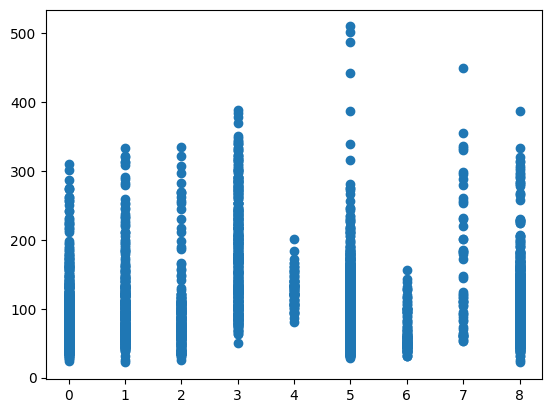

In [244]:
plt.scatter(x=data["City"],y=data["AQI"])
plt.show()

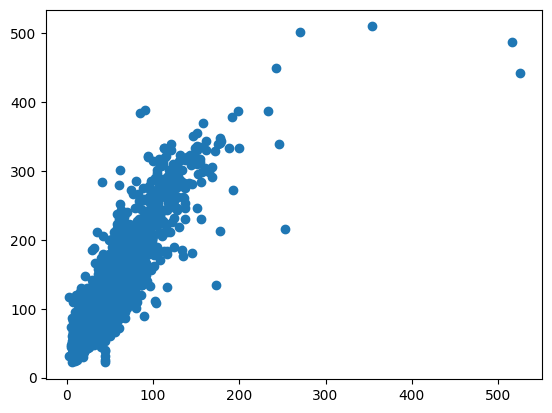

In [245]:
plt.scatter(x=data["PM2.5"],y=data["AQI"])
plt.show()

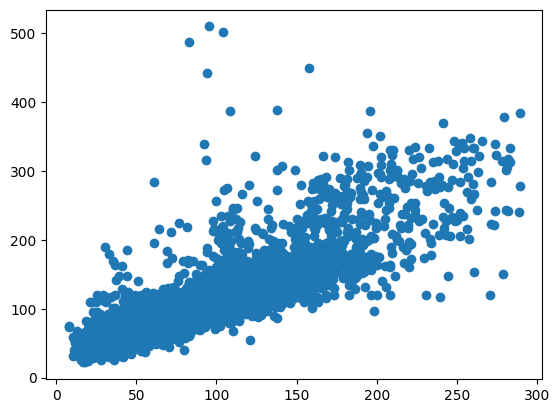

In [246]:
plt.scatter(x=data["PM10"],y=data["AQI"])
plt.show()

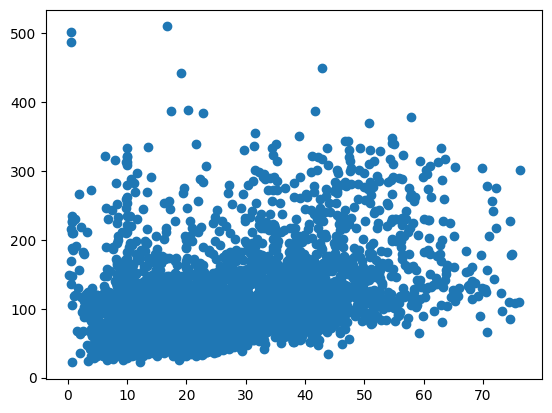

In [247]:
plt.scatter(x=data["NO2"],y=data["AQI"])
plt.show()

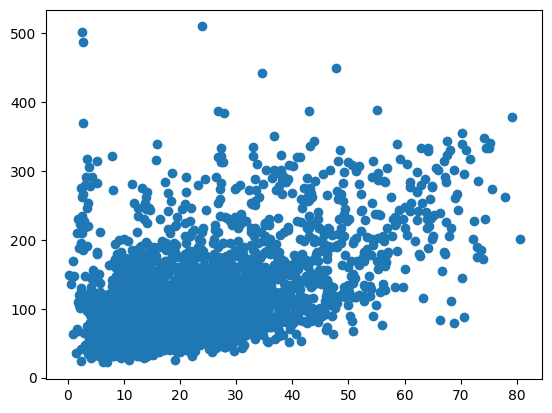

In [248]:
plt.scatter(x=data["NOx"],y=data["AQI"])
plt.show()

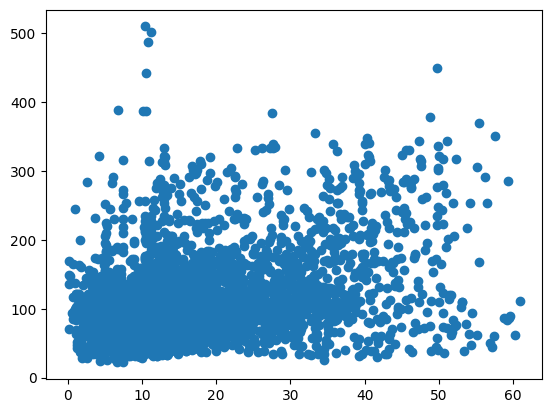

In [249]:
plt.scatter(x=data["NH3"],y=data["AQI"])
plt.show()

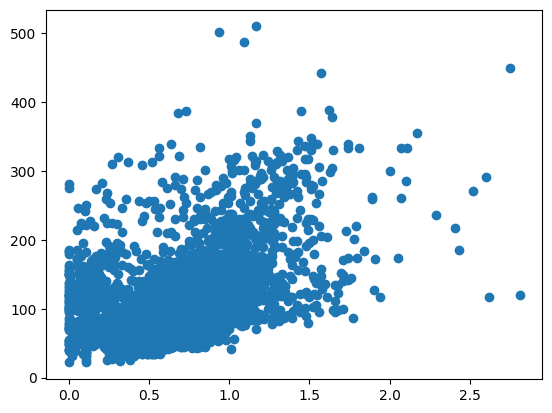

In [250]:
plt.scatter(x=data["CO"],y=data["AQI"])
plt.show()

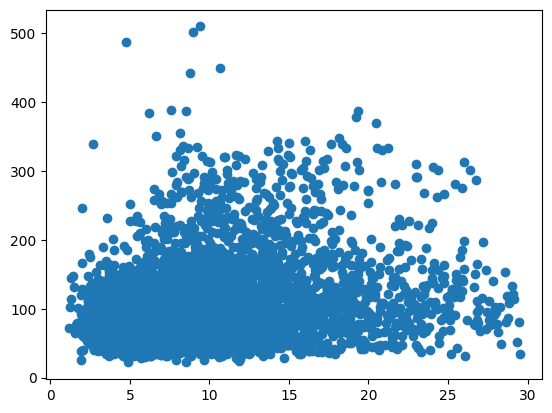

In [251]:
plt.scatter(x=data["SO2"],y=data["AQI"])
plt.show()

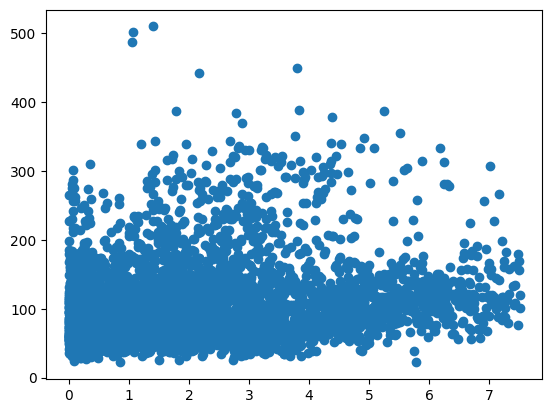

In [252]:
plt.scatter(x=data["Benzene"],y=data["AQI"])
plt.show()

In [253]:
data.drop('Benzene',axis=1)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
2136,0,122.88,208.86,5.56,54.87,33.71,17.96,0.27,22.97,68.60,6.28,0.21,310.0,Very Poor,2017,12
2137,0,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,4.79,0.16,196.0,Moderate,2017,12
2138,0,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,4.29,0.10,132.0,Moderate,2017,12
2139,0,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,5.51,0.16,147.0,Moderate,2017,12
2140,0,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,7.01,0.19,179.0,Moderate,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,8,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,5.37,1.45,47.0,Good,2020,6
29526,8,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,12.07,0.73,41.0,Good,2020,6
29527,8,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,2.21,0.38,70.0,Satisfactory,2020,6
29528,8,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.00,68.0,Satisfactory,2020,6


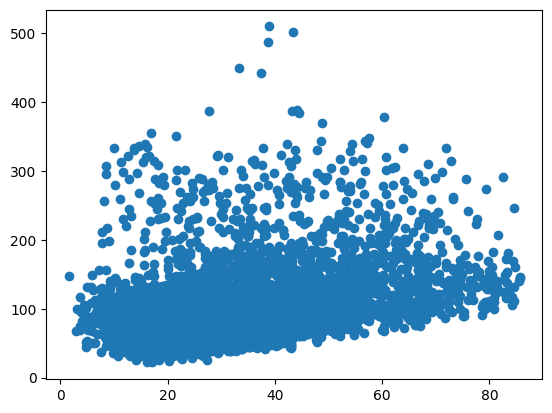

In [254]:
plt.scatter(x=data["O3"],y=data["AQI"])
plt.show()

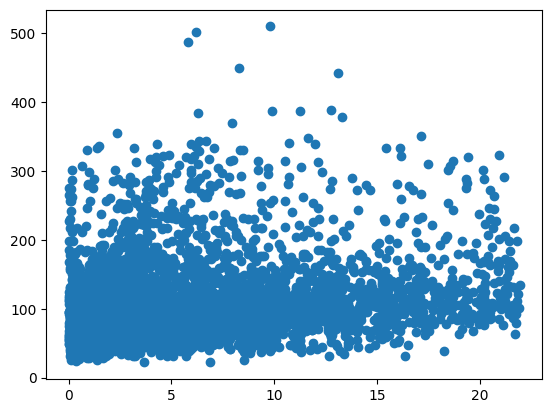

In [255]:
plt.scatter(x=data["Toluene"],y=data["AQI"])
plt.show()

In [256]:
features=data[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
labels=data['AQI']

In [257]:
features

,City,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene
2136,0,122.88,208.86,5.56,54.87,33.71,0.27,22.97,68.60,0.36,6.28,0.21
2137,0,74.28,141.22,6.10,44.97,28.88,0.09,21.90,60.62,0.26,4.79,0.16
2138,0,50.32,102.77,1.73,33.85,19.41,0.10,13.65,68.15,0.20,4.29,0.10
2139,0,58.47,115.27,4.93,41.64,26.15,0.16,18.37,73.75,0.23,5.51,0.16
2140,0,89.35,131.48,7.97,42.10,28.88,0.24,7.42,44.67,0.28,7.01,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...
29525,8,7.63,32.27,5.91,23.27,17.19,0.46,6.87,19.90,1.45,5.37,1.45
29526,8,15.02,50.94,7.68,25.06,19.54,0.47,8.55,23.30,2.24,12.07,0.73
29527,8,24.38,74.09,3.42,26.06,16.53,0.52,12.72,30.14,0.74,2.21,0.38
29528,8,22.91,65.73,3.45,29.53,18.33,0.48,8.42,30.96,0.01,0.01,0.00


In [258]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=2)

In [259]:
x_train.shape

(3343, 12)

# Random Forest

In [260]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0,max_depth=5)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [261]:
y_pred=model.predict(x_test)

In [262]:
from sklearn.metrics import r2_score
r=r2_score(y_pred,y_test)
r

0.8456427823178968

In [263]:
from sklearn.metrics import mean_squared_error
err=mean_squared_error(y_pred,y_test)
err

466.97899693213463

# Linear Regression

In [264]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

R-squared (R2): 0.8460
Mean Squared Error (MSE): 521.1091


# SVR

In [265]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1)).ravel() # Reshape y
x_test_scaled = scaler_x.transform(x_test)
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model_svr.fit(x_train_scaled, y_train_scaled)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [266]:
y_pred_scaled = model_svr.predict(x_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print(f"R-squared (R2): {r2_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")

R-squared (R2): 0.8684
Mean Squared Error (MSE): 445.4603
Root Mean Squared Error (RMSE): 21.1059
